# Round 2
Todo:
- fix r1 things and market making
- test for stat arb between baskets
- do this MGBM thing

In [45]:
# COINT

import numpy as np
import pandas as pd

df = pd.read_csv("../r2 (1)/hist_train/0.csv", sep=";")
j_df = df[df["product"] == "JAMS"].fillna(0)
d_df = df[df["product"] == "DJEMBES"].fillna(0)
c_df = df[df["product"] == "CROISSANTS"].fillna(0)
p1_df = df[df["product"] == "PICNIC_BASKET1"].fillna(0)
p2_df = df[df["product"] == "PICNIC_BASKET1"].fillna(0)

def vwap(df):
    res = list()
    for i, j in df.iterrows():
        prices = np.array([j.iloc[3], j.iloc[5], j.iloc[7], j.iloc[9], j.iloc[11], j.iloc[13]])
        vols = np.array([j.iloc[4], j.iloc[6], j.iloc[8], j.iloc[10], j.iloc[12], j.iloc[14]])

        # print(np.dot(prices,vols), np.sum(vols))
        res.append(np.dot(prices, vols) / np.sum(vols))
    return res

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.regression.rolling import RollingOLS

res = coint(vwap(c_df), vwap(j_df))

print(res)

(-1.3369685728835379, 0.8183015394408581, array([-3.89753563, -3.33674114, -3.04487419]))


In [ ]:
# TEST FOR SIMILARITIES TO LAST YEAR'S DATA
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

cur_df = pd.read_csv("../r2 (1)/hist_train/0.csv", sep=";")
prev_df = pd.read_csv("prices_round_3_day_0.csv", sep=";")

old_straw = list()
old_choco = list()
old_roses = list()


straw_df = prev_df[prev_df["product"]=="STRAWBERRIES"]["mid_price"]
choco_df = prev_df[prev_df["product"]=="CHOCOLATE"]["mid_price"]
roses_df = prev_df[prev_df["product"]=="ROSES"]["mid_price"]

j_df = cur_df[cur_df["product"] == "JAMS"]["mid_price"]
d_df = cur_df[cur_df["product"] == "DJEMBES"]["mid_price"]
c_df = cur_df[cur_df["product"] == "CROISSANTS"]["mid_price"]

X = [((straw_df.iloc[x+1]-straw_df.iloc[x])/straw_df.iloc[x], (choco_df.iloc[x+1]-choco_df.iloc[x])/choco_df.iloc[x], (roses_df.iloc[x+1]-roses_df.iloc[x])/roses_df.iloc[x]) for x in range(len(straw_df)-1)]   
y = [(j_df.iloc[x+1]-j_df.iloc[x])/j_df.iloc[x] for x in range(len(straw_df)-1)]

print(X)
print(Y)
reg = LinearRegression().fit(X, y)
score = reg.score(X, y)
print(score, reg.coef_, reg.intercept_)

## MGBM thing


In [23]:
import numpy as np
import pandas as pd

df = pd.read_csv("../r2/hist_train/0.csv", sep=";")
j_df = df[df["product"] == "JAMS"].fillna(0)
d_df = df[df["product"] == "DJEMBES"].fillna(0)
c_df = df[df["product"] == "CROISSANTS"].fillna(0)
p1_df = df[df["product"] == "PICNIC_BASKET1"].fillna(0)
p2_df = df[df["product"] == "PICNIC_BASKET1"].fillna(0)

def vwap(df):
    res = list()
    for i, j in df.iterrows():
        prices = np.array([j.iloc[3], j.iloc[5], j.iloc[7], j.iloc[9], j.iloc[11], j.iloc[13]])
        vols = np.array([j.iloc[4], j.iloc[6], j.iloc[8], j.iloc[10], j.iloc[12], j.iloc[14]])

        # print(np.dot(prices,vols), np.sum(vols))
        res.append(np.dot(prices, vols) / np.sum(vols))
    return res

prices_1 = np.array([vwap(j_df), vwap(c_df), vwap(d_df), vwap(p1_df)]).T
prices_2 = np.array([vwap(j_df), vwap(c_df), vwap(p2_df)]).T

def estimate_mgbm(prices):
    log_returns = np.log(prices[1:]/prices[:-1])
    dt = 1

    mu_hat = np.mean(log_returns, axis=0) / dt
    sigma_hat = np.std(log_returns, axis=0, ddof=1) / np.sqrt(dt)
    mu_true = mu_hat + 0.5 * sigma_hat**2

    cov_matrix = np.cov(log_returns.T) / dt

    return mu_true, sigma_hat, cov_matrix

print(estimate_mgbm(prices_2)[0])

[-1.36363615e-06 -1.06763499e-06 -8.58717527e-07]


# Round 1

RR and Kelp will likely stay the same. I'm using days -2 and -1 to do data analysis things. I'm using exclusively day 0 to test the models. Two things to note here.

1. It seems like Kelp and Squid Ink can be pair traded.
2. Squid Ink is supposed to mean revert. We are hinted that we should not market make on this product (source: [Round 1 Wiki](https://imc-prosperity.notion.site/Round-1-19ee8453a09381d18b78cf3c21e5d916))

Plan: do whatever we were doing with rainforest resin. Exclusively market take on squid ink using some kind of moving average. Market make on kelp IF movement isn't crazy; otherwise, think about pair trading with squid ink.

In [47]:
# !pip install -U prosperity3bt
!prosperity3bt "trading_michael_2-1.py" 2 --match-trades worse --merge-pnl --vis


Backtesting G:\.shortcut-targets-by-id\1kCoYjL0gKyLojwoocZDIngh_T8m7DBqw\IMC Prosperity Event\Michael Work\trading_michael_2-1.py on round 2 day -1
CROISSANTS: 0
DJEMBES: -1,508
JAMS: 0
KELP: 3,405
PICNIC_BASKET1: 42,506
PICNIC_BASKET2: 22,424
RAINFOREST_RESIN: 15,020
SQUID_INK: 4,650
Total profit: 86,497

Backtesting G:\.shortcut-targets-by-id\1kCoYjL0gKyLojwoocZDIngh_T8m7DBqw\IMC Prosperity Event\Michael Work\trading_michael_2-1.py on round 2 day 0
CROISSANTS: 0
DJEMBES: -1,014
JAMS: 0
KELP: 3,374
PICNIC_BASKET1: 9,968
PICNIC_BASKET2: -10,881
RAINFOREST_RESIN: 15,352
SQUID_INK: 784
Total profit: 17,584

Backtesting G:\.shortcut-targets-by-id\1kCoYjL0gKyLojwoocZDIngh_T8m7DBqw\IMC Prosperity Event\Michael Work\trading_michael_2-1.py on round 2 day 1
CROISSANTS: 0
DJEMBES: 1,696
JAMS: 0
KELP: 3,548
PICNIC_BASKET1: 17,716
PICNIC_BASKET2: 17,337
RAINFOREST_RESIN: 14,950
SQUID_INK: 2,971
Total profit: 58,218

Profit summary:
Round 2 day -1: 86,497
Round 2 day 0: 17,584
Round 2 day 1: 58,21


100%|##########| 10000/10000 [00:08<00:00, 1139.13it/s]

100%|##########| 10000/10000 [00:08<00:00, 1148.86it/s]

100%|##########| 10000/10000 [00:08<00:00, 1171.81it/s]


# Stoikov Market Making

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression


df = pd.read_csv("../r1/Algo Historical Data/Train/prices_round_1_day_-2.csv", sep=";")
df = df[df["product"] == "KELP"].fillna(0)

trades_df = pd.read_csv("../r1/Algo Historical Data/Train/trades_round_1_day_-2.csv", sep=";")
trades_df = trades_df[trades_df["symbol"] == "KELP"]

def vwap(df):
    res = list()
    for i, j in df.iterrows():
        prices = np.array([j.iloc[3], j.iloc[5], j.iloc[7], j.iloc[9], j.iloc[11], j.iloc[13]])
        vols = np.array([j.iloc[4], j.iloc[6], j.iloc[8], j.iloc[10], j.iloc[12], j.iloc[14]])

        # print(np.dot(prices,vols), np.sum(vols))
        res.append(np.dot(prices, vols) / np.sum(vols))
    return res

vwap_prices = np.array(vwap(df))

plt.plot(range(len(df)), npdf - vwap_prices)

# spreads = [x for x in range(50)]
# arrivals = [0]*50

# for i,j in trades_df.iterrows():
#     spread = round(j.iloc[5] - vwap_prices[i])
#     arrivals[spread] += 1

# print(vwap_prices)

# # Assuming mid_prices is a 1D numpy array of mid prices over time
# log_returns = np.log(vwap_prices[1:] / vwap_prices[:-1])
# print(log_returns)
# dt = 1  # if you're using 1-minute bars, for example
# sigma = np.std(log_returns)


# log_lambda = np.log(np.array(arrivals) + 1e-6)  # avoid log(0)
# X = np.array(spreads).reshape(-1, 1)
# reg = LinearRegression().fit(X, log_lambda)

# k = -reg.coef_[0]
# logA = reg.intercept_
# A = np.exp(logA)

# gamma = 0.5

# print(sigma, A, k)

ValueError: Unable to coerce to Series, length must be 17: given 10000

# OU Market Making

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
from scipy import stats

df = pd.read_csv("../r1/Algo Historical Data/Train/prices_round_1_day_-2.csv", sep=";")
ink_df = df[df["product"] == "KELP"].fillna(0)

# takes the volume weighted average bid price

def vwap(df):
    res = list()
    for i, j in df.iterrows():
        prices = np.array([j.iloc[3], j.iloc[5], j.iloc[7], j.iloc[9], j.iloc[11], j.iloc[13]])
        vols = np.array([j.iloc[4], j.iloc[6], j.iloc[8], j.iloc[10], j.iloc[12], j.iloc[14]])

        # print(np.dot(prices,vols), np.sum(vols))
        res.append(np.dot(prices, vols) / np.sum(vols))
    return res

vwap_prices = vwap(ink_df)

dt = 1
prices = np.array(vwap_prices)
x_t = 10000 - prices[:-1]
y_t = prices[1:] - prices[:-1]

# Linear regression: y_t = theta * x_t * dt + noise
slope, _, _, _, _ = stats.linregress(x_t, y_t)
theta = slope / dt

# Residuals to estimate sigma
residuals = y_t - theta * x_t * dt
sigma = np.std(residuals) / np.sqrt(dt)

print(theta, sigma)

0.00038066031453491743 0.25448849125175543


## ~~Rainforest Resin~~
~~Market take around 10k. Find optimal spread to offload excess through market making.~~

Completed; score of 2k on tutorial.

# EMA

[2000.0, 2000.0, 1999.5, 1999.5, 1999.4, 1999.6499999999999, 1999.5785714285714, 1999.7660714285714, 1999.9882936507938, 1999.7382936507936, 1999.7382936507936, 1999.7382936507936, 1999.7382936507934, 1999.7382936507934, 1999.5382936507933, 1999.6320436507933, 1999.6614554154992, 1999.6614554154994, 1999.6088238365521, 1999.7838238365523]


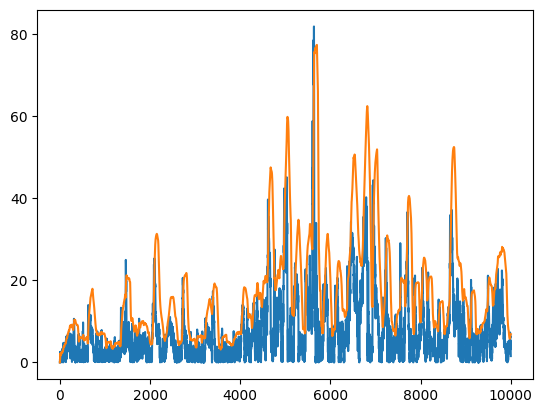

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

df = pd.read_csv("../r1/Algo Historical Data/Train/prices_round_1_day_-2.csv", sep=";")

ink_df = df[df["product"] == "SQUID_INK"]
ink_price = list(ink_df["mid_price"].values)
timeframe = len(ink_price)

RunningSMA = list()

for x in range(timeframe):

    time_weight = np.array([y for y in range(x+2)[1:]])
    RunningSMA.append(2 * np.dot(time_weight, np.array(ink_price[0:x+1])) / (len(time_weight) * (len(time_weight) + 1)))

EMA = list()

for x in range(20):
    EMA.append((sum(EMA) + ink_price[x]) / (x+1))

print(EMA)

for x in range(timeframe)[20:]:    
    EMA.append(0.01 * ink_price[x] + 0.99 * EMA[-1])


advanced_EMA = list()

for x in range(100):
    advanced_EMA.append(RunningSMA[x])

for x in range(timeframe)[100:]:
    advanced_EMA.append(0.01 * ink_price[x] + 0.99 * advanced_EMA[-1])

ink_diff = list()
ink_vol_list = list()

for x in range(timeframe):
    ink_diff.append((advanced_EMA[x] - ink_price[x])**2)
    if len(ink_diff) > 100:
        ink_diff.pop(0)
    ink_vol_list.append(math.sqrt(sum(ink_diff) / len(ink_diff)))

price_diff = [float(abs(advanced_EMA[x] - ink_price[x])) for x in range(timeframe)]
        
# plt.plot(range(timeframe), ink_price)
# plt.plot(range(timeframe), RunningSMA)
# plt.plot(range(timeframe), EMA)
# plt.plot(range(timeframe), advanced_EMA)
plt.plot(range(timeframe), price_diff)
plt.plot(range(timeframe), [2*x for x in ink_vol_list])

## ~~Pair Trading test~~
~~Check to see if squid ink and kelp are related.~~

~~Pair trading sucks and you should never do it. I don't know why I keep trying.~~



In [25]:
# !pip install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.regression.rolling import RollingOLS

# from google.colab import drive
# drive.mount('/content/drive/')
# df = pd.read_csv("drive/MyDrive/NU/IMC Prosperity Event/r1/Algo Historical Data/Train")

def pairs_test_coint(n: int):

    df = pd.read_csv("../r1/Algo Historical Data/Train/prices_round_1_day_-1.csv", sep=";")
    
    delay = n
    
    ink_df = df[df["product"] == "SQUID_INK"]
    kelp_df = df[df["product"] == "KELP"]

    reses = list()

    while delay > 0:
    
        ink_price = list(ink_df["mid_price"].values)[0:-delay]
        kelp_price = list(kelp_df["mid_price"].values)[delay:]
    
        # print(len(ink_price), len(kelp_price))
        
        res = coint(ink_price, kelp_price)

        reses.append((delay, res))
        
        print(f"{n+1-delay} out of {n}")

        delay -= 1

    reses.sort(key=lambda x: x[1][1])

    return reses

def pairs_test_reg(n: int):

    df = pd.read_csv("../r1/Algo Historical Data/Train/prices_round_1_day_-1.csv", sep=";")
    
    delay = 1
    
    ink_df = df[df["product"] == "SQUID_INK"]
    kelp_df = df[df["product"] == "KELP"]

    reses = list()

    while delay > 0:
    
        ink_price = list(ink_df["mid_price"].values)
        kelp_price = list(kelp_df["mid_price"].values)

        ink_diff = []
        kelp_diff = []

        for x in range(len(ink_price)-1):
            ink_diff.append(ink_price[x+1] - ink_price[x])
        for x in range(len(kelp_price)-1):
            kelp_diff.append(kelp_price[x+1] - kelp_price[x])

        def reshape(x):
            return [[y] for y in x]

        ink_diff = reshape(ink_diff)
        # print(len(ink_price), len(kelp_price))
        
        res = LinearRegression().fit(ink_diff, kelp_diff)

        reses.append((delay, res.score(ink_diff, kelp_diff)))
        
        print(f"{n+1-delay} out of {n}")

        delay -= 1

    reses.sort(key=lambda x: -abs(x[1]))
    
    return reses

for x in pairs_test_reg(20)[0:5]:
    print(f"Delay of {x[0]}: {x[1]}")




20 out of 20
Delay of 1: 0.07310911978553047


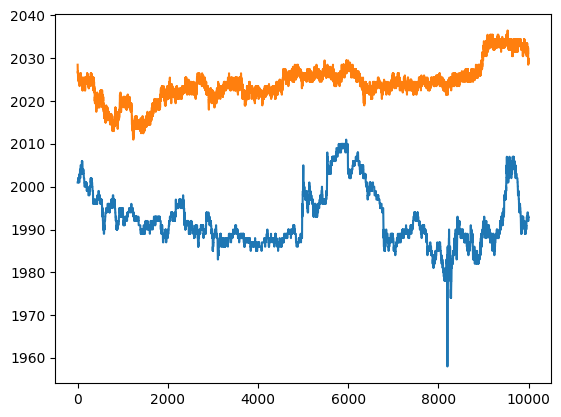

In [24]:
df = pd.read_csv("../r1/Algo Historical Data/Train/prices_round_1_day_-1.csv", sep=";")

ink_df = df[df["product"] == "SQUID_INK"]
kelp_df = df[df["product"] == "KELP"]

prices = list()

ink_price = [(x//4)+1500 for x in ink_df["mid_price"].values]
kelp_price = list(kelp_df["mid_price"].values)
diff = [ink_price[x] - kelp_price[x] for x in range(len(ink_price))]

for x in range(len(ink_price)):
    prices.append((ink_price[x],kelp_price[x]))

plt.plot(range(len(ink_price)), prices)